In [1]:
!pip install matplotlib

In [6]:
import json
from tqdm.notebook import tqdm
import jsonlines
import os
import glob
import hashlib
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = f'/data/sbmaruf/xCodeEval/dumped'
private_dir = f"{DATA_DIR}/retrieval/private"
test_glob = f"/data/sbmaruf/data/retrieval_code_code/test/*.jsonl"

In [8]:
GLOBAL_SALT = "JACKAL_1586_1000000007"

def md5(v, slt=GLOBAL_SALT):
    return hashlib.md5(f"{v}_{slt}".encode()).hexdigest()

In [9]:
ctx_id_to_src_uid = {}

for meta_file in os.listdir(private_dir):
    file_path = os.path.join(private_dir, meta_file)
    lang = meta_file.split("_")[0]
    with jsonlines.open(file_path) as jrp:
        for meta in tqdm(jrp, desc=lang):
            idx = meta["idx"]
            src_uid = md5(meta["metadata"]["problem_id"])
            ctx_id = f"{lang}:{idx}"
            ctx_id_to_src_uid[ctx_id] = src_uid

PHP: 0it [00:00, ?it/s]

Go: 0it [00:00, ?it/s]

C: 0it [00:00, ?it/s]

Javascript: 0it [00:00, ?it/s]

C#: 0it [00:00, ?it/s]

Python: 0it [00:00, ?it/s]

Ruby: 0it [00:00, ?it/s]

D: 0it [00:00, ?it/s]

Ocaml: 0it [00:00, ?it/s]

Scala: 0it [00:00, ?it/s]

Perl: 0it [00:00, ?it/s]

Haskell: 0it [00:00, ?it/s]

Java: 0it [00:00, ?it/s]

Kotlin: 0it [00:00, ?it/s]

Pascal: 0it [00:00, ?it/s]

Rust: 0it [00:00, ?it/s]

C++: 0it [00:00, ?it/s]

In [21]:
test_data = []

for test_file in glob.glob(test_glob):
    with jsonlines.open(test_file) as jrp:
        for sample in tqdm(jrp, desc=test_file):
            lang = test_file.split("/")[-1].split("_")[0]
            test_data.append((sample, lang))

/data/sbmaruf/data/retrieval_code_code/test/C++_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Scala_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Go_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/D_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/C#_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Python_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Java_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Kotlin_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Javascript_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Rust_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Ruby_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/PHP_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Ocaml_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/C_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Perl_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Pascal_code_code_test_file.jsonl: 0it [00:00, ?it/s]

/data/sbmaruf/data/retrieval_code_code/test/Haskell_code_code_test_file.jsonl: 0it [00:00, ?it/s]

In [11]:
# recall@k function
def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = round(len(act_set & pred_set) / float(len(act_set)), 2)
    return result

def mrr():
    pass

def precision():
    pass

In [12]:
def evaluate_src_uid(dpr_out_json, top_k=100):


    total_query = len(test_data)
    total_retrived = len(dpr_out_json)
    assert total_query == total_retrived, f"{total_query} {total_retrived}"

    tt_code_to_src_uid = {}
    for sample in test_data:
        code = sample["source_code"]
        tt_code_to_src_uid[code] = sample["src_uid"]
    
    product_stat = [0 for _ in range(int(top_k))]
    cat_stat = [0 for _ in range(int(top_k))]

    valid_query = 0
    for idx, ex in enumerate(tqdm(dpr_out_json, total=len(dpr_out_json))):
        ctxs = ex['ctxs']
        cat_found = False
        question = ex["question"]
        try:
            tt = tt_code_to_src_uid[question]
        except KeyError as E:
            print(question[:30])
            continue
        valid_query+=1

        for rank, ctx in enumerate(ctxs):
            if ctx_id_to_src_uid[ctx["id"]] == tt:
                for r in range(rank, int(top_k)):
                    product_stat[r]+=1
            #         if not cat_found:
            #             cat_stat[r]+=1
                break
            # else:
            #     if prod_to_cat[ctx["id"]] == tt["category"] and not cat_found: #same as above but differnt variable
            #         cat_found = True
            #         for r in range(rank, int(top_k)):
            #             cat_stat[r]+=1



    print("Total Query: ", total_query)
    print("Valid Query: ", valid_query)
    r_at_k = []
    for i in range(int(top_k)):
        print("-"*10, "START", "-"*10)
        print("At K:", i)
        score = 100*product_stat[i]/valid_query
        r_at_k.append(score)
        print("Product Acc:", product_stat[i], "or ", score,"%")
        # print("Cat Acc:", cat_stat[i], "or ", 100*cat_stat[i]/valid_query,"%")
        print("-" * 10, "END", "-" * 10)
        print("\n")
    return r_at_k

In [35]:
def evaluate_src_uid_xlang(dpr_out_json, top_k=100):
    all_langs = "Javascript Go Perl Python Haskell Pascal C++ Scala D Rust C PHP Kotlin Ruby C# Java Ocaml".split()
    total_query = len(test_data)
    total_retrived = len(dpr_out_json)
    assert total_query == total_retrived, f"{total_query} {total_retrived}"

    tt_code_to_src_uid = {}
    tt_code_to_lang = {}
    for (sample, lang) in test_data:
        code = sample["source_code"]
        tt_code_to_src_uid[code] = sample["src_uid"]
        tt_code_to_lang[code] = lang
    
    product_stat = {lang: [0 for _ in range(int(top_k))] for lang in all_langs}
    cat_stat = {lang: [0 for _ in range(int(top_k))] for lang in all_langs}

    valid_query = 0
    val_query_by_lang = {lang: 0 for lang in all_langs}
    for idx, ex in enumerate(tqdm(dpr_out_json, total=len(dpr_out_json))):
        
        ctxs = ex['ctxs']
        cat_found = False
        question = ex["question"]
        try:
            tt = tt_code_to_src_uid[question]
        except KeyError as E:
            print(question[:30])
            continue
        lang = tt_code_to_lang[question]
        valid_query+=1
        val_query_by_lang[lang] += 1
        for rank, ctx in enumerate(ctxs):
            if ctx_id_to_src_uid[ctx["id"]] == tt:
                for r in range(rank, int(top_k)):
                    product_stat[lang][r]+=1
            #         if not cat_found:
            #             cat_stat[r]+=1
                break
            # else:
            #     if prod_to_cat[ctx["id"]] == tt["category"] and not cat_found: #same as above but differnt variable
            #         cat_found = True
            #         for r in range(rank, int(top_k)):
            #             cat_stat[r]+=1



    print("Total Query: ", total_query)
    print("Valid Query: ", valid_query)
    r_at_k = {lang: [] for lang in all_langs}
    for lang in all_langs:
        for i in range(int(top_k)):
            # print("-"*10, "START", "-"*10)
            # print("At K:", i)
            score = 100*product_stat[lang][i]/val_query_by_lang[lang]
            r_at_k[lang].append(score)
            # print("Product Acc:", product_÷stat[i], "or ", score,"%")
            # print("Cat Acc:", cat_stat[i], "or ", 100*cat_stat[i]/valid_query,"%")
            # print("-" * 10, "END", "-" * 10)
            # print("\n")
    return r_at_k

In [36]:
dpr_out_json_path = "/data/sbmaruf/zarzis/codebert_xCodeEval/16-39-51/XCL_Retrieval_code_code_test_ckpt39*.json"

r_at_k_b32 = {}

for out_file in tqdm(glob.glob(dpr_out_json_path)):
    with open(out_file) as dpr_out_rp:
        dpr_out_json = json.load(dpr_out_rp)
        r_at_k_b32[out_file] = evaluate_src_uid_xlang(dpr_out_json, top_k=100)
    

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


  0%|          | 0/10044 [00:00<?, ?it/s]

import java.util.*;
import jav
Total Query:  10044
Valid Query:  10043


In [37]:
ks = [1, 2, 5, 10, 20, 50, 100]
eval_out_dict = {}
for k in ks:
    eval_out_dict[k] = {}
    for out_file, r_at_k_d in r_at_k_b32.items():
        ctx_lang = out_file.split("_")[-1].split(".")[0]
        eval_out_dict[k][ctx_lang] = {}
        for q_lang, r_at_k in r_at_k_d.items():
            eval_out_dict[k][ctx_lang][q_lang] = r_at_k[k-1]
            print(k, ctx_lang, q_lang, r_at_k[k-1])
            
with open("cross_lang_dpr_eval_scores.json", "w") as wp:
    json.dump(eval_out_dict, wp)

1 Kotlin Javascript 33.25688073394495
1 Kotlin Go 35.16873889875666
1 Kotlin Perl 14.193548387096774
1 Kotlin Python 12.440191387559809
1 Kotlin Haskell 20.63758389261745
1 Kotlin Pascal 19.852941176470587
1 Kotlin C++ 1.0018214936247722
1 Kotlin Scala 37.05357142857143
1 Kotlin D 32.76450511945392
1 Kotlin Rust 22.66355140186916
1 Kotlin C 7.017543859649122
1 Kotlin PHP 31.619537275064268
1 Kotlin Kotlin 92.85714285714286
1 Kotlin Ruby 19.15641476274165
1 Kotlin C# 17.197452229299362
1 Kotlin Java 12.929292929292929
1 Kotlin Ocaml 25.88235294117647
1 Python Javascript 52.522935779816514
1 Python Go 50.62166962699823
1 Python Perl 34.83870967741935
1 Python Python 89.83253588516746
1 Python Haskell 35.23489932885906
1 Python Pascal 33.333333333333336
1 Python C++ 10.018214936247723
1 Python Scala 52.232142857142854
1 Python D 16.38225255972696
1 Python Rust 14.719626168224298
1 Python C 21.17794486215539
1 Python PHP 50.89974293059126
1 Python Kotlin 35.907335907335906
1 Python Ruby 42

In [ ]:
# fig = plt.figure(figsize=(20, 10))
# plt.plot(range(1, 101), r_at_k)
# plt.xlabel('k')
# plt.ylabel('Recall@k')
# plt.title('Recall@k Curve')
# plt.show()
# fig.savefig("XCL_Retrieval_code_code_test_ckpt_35_b16.pdf", dpi=250)
# fig.show()

In [ ]:
# dpr_out_json_path = "/home/maruf/zarzis/codebert_xCodeEval/XCL_Retrieval_code_code_test_ckpt_35_b32.json"

# with open(dpr_out_json_path) as dpr_out_rp:
#     dpr_out_json = json.load(dpr_out_rp)
#     r_at_k_b32 = evaluate_src_uid(dpr_out_json, top_k=100)


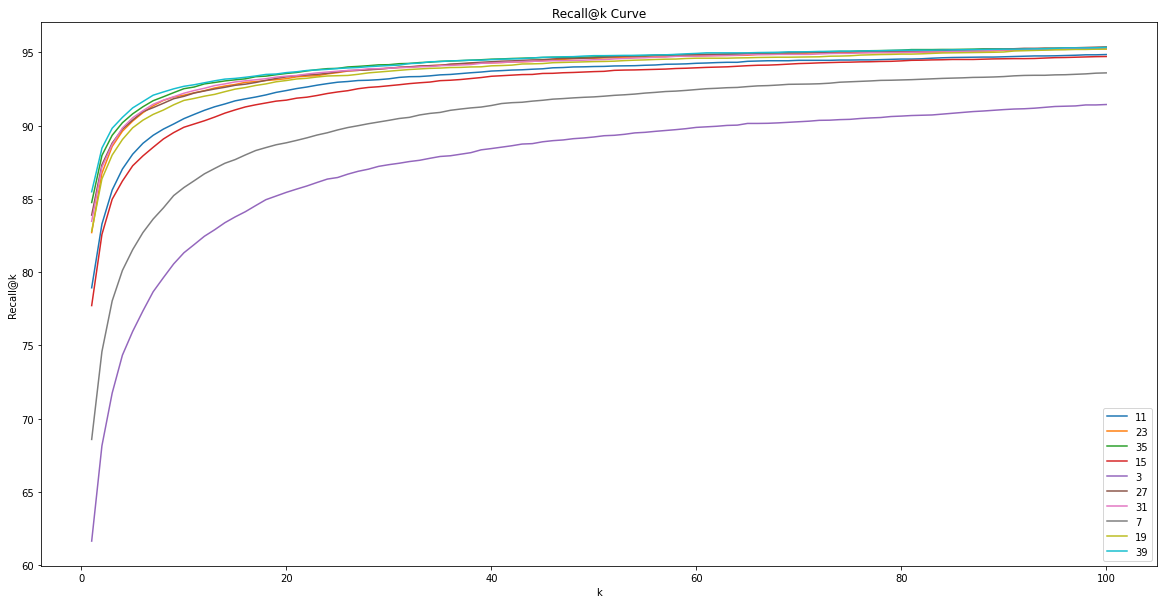

In [26]:
fig = plt.figure(figsize=(20, 10))
for out_file, r_at_k in r_at_k_b32.items():
    ckpt = out_file.split("ckpt")[1].split(".")[0]
    plt.plot(range(1, 101), r_at_k, label=ckpt)
plt.xlabel('k')
plt.ylabel('Recall@k')
plt.title('Recall@k Curve')
plt.legend()
plt.show()
fig.savefig("XCL_Retrieval_code_code_test_b32_ckpt_all.pdf", dpi=250)
fig.show()